## Make a Fake/Synthetic Dataset to test KIF on

Reviewer comment: "Construct a model system with synthetic data where correlated features are known a priori, and show the method works. I would especially like to see a test where duplicate copies of some features are added. Does the method still work?"

**Synthetic dataset should have the following qualities:**
- Continuous, tabular data, both classification and regression. 
- ~10,000 observations to match expected datasets size.
- Features/interactions should not have values less than 0. 


In this notebook, the synthetic data required to test the methods within KIF will be generated and analysed to ensure they meet the requirements set out above. 

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.graph_objects as go

### Part 1: Generate a dataset with the a continous target variable
Following this protocol: https://stats.stackexchange.com/questions/111865/tool-for-generating-correlated-data-sets 

In [2]:
# Constants.
n_rows = 10000

# Define a range of targetted correlations
correlations = {"r2_min_0_05" : -0.05,  "r2_min_0_15" : 0.15, "r2_min_0_25" : -0.25,
                "r2_min_0_35" : -0.35,  "r2_min_0_45" : -0.45, "r2_min_0_55" : -0.55,
                "r2_min_0_65" : -0.65, "r2_min_0_75" : -0.75, "r2_min_0_85" : -0.85, 
                "r2_plus_0_1" : 0.1,  "r2_plus_0_2" : 0.2, "r2_plus_0_3" : 0.3,
                "r2_plus_0_4" : 0.4,  "r2_plus_0_5" : 0.5, "r2_plus_0_6" : 0.6,
                "r2_plus_0_7" : 0.7, "r2_mplus_0_8" : 0.8, "r2_plus_0_9" : 0.9}

# Generate 1 normally distrituted and 1 uniformly distrubited x column. 
x0_normal = np.random.normal(loc=10, scale=3, size=n_rows)
x0_uniform = np.random.default_rng().uniform(low=0, high=10, size=n_rows)

# define the y-variable with a normal distribution. 
y = np.random.normal(loc=10, scale=3, size=n_rows)

In [3]:
# Generate the synthetic data. 
normal_xs, uniform_xs = {}, {}
for name, r in correlations.items():

    # generate new colums from the normally distributed x column.
    normal_x = (y - y.mean()) * r + (x0_normal - np.polyfit(y, x0_normal, 1)[0] * y - x0_normal.mean()) * np.sqrt(1 - r * r)
    column_name = name + "_normal" 
    normal_xs.update({column_name: normal_x})

    # generate new colums from the uniformly distributed x column. 
    uniform_x = (y - y.mean()) * r + (x0_uniform - np.polyfit(y, x0_uniform, 1)[0] * y - x0_uniform.mean()) * np.sqrt(1 - r * r)
    column_name = name + "_uniform" 
    uniform_xs.update({column_name: uniform_x})

In [4]:
# Clean and merge the synthetic datasets
df_normal = pd.DataFrame.from_dict(normal_xs) 
df_uniform = pd.DataFrame.from_dict(uniform_xs) 

def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Make all columns lowest value 0, to better match the real data"""
    for column in df.columns:
        min_value = df[column].min()
        if min_value < 0:
            df[column] = round(df[column] - min_value, 3)
    return df
    
df_normal = clean_columns(df_normal)
df_uniform = clean_columns(df_uniform)

min(df_normal.min()) # smallest value in all columns = 0, so worked..

0.0

In [5]:
# Merge target and features. 
y_df = pd.Series(y).to_frame("Target")

synth_df = pd.concat([y_df, df_normal, df_uniform], axis=1)
with pd.option_context("display.max_rows", 6):
    display(synth_df)

,Target,r2_min_0_05_normal,r2_min_0_15_normal,r2_min_0_25_normal,r2_min_0_35_normal,r2_min_0_45_normal,r2_min_0_55_normal,r2_min_0_65_normal,r2_min_0_75_normal,r2_min_0_85_normal,...,r2_min_0_85_uniform,r2_plus_0_1_uniform,r2_plus_0_2_uniform,r2_plus_0_3_uniform,r2_plus_0_4_uniform,r2_plus_0_5_uniform,r2_plus_0_6_uniform,r2_plus_0_7_uniform,r2_mplus_0_8_uniform,r2_plus_0_9_uniform
0,14.302265,13.981,14.982,14.985,15.265,15.378,15.299,14.983,14.349,13.222,...,7.921,7.631,8.952,10.206,11.389,12.490,13.726,14.980,16.099,16.983
1,10.950260,10.209,10.579,12.003,12.743,13.364,13.848,14.164,14.254,13.993,...,9.998,5.837,6.845,7.802,8.704,9.544,10.542,11.586,12.538,13.327
2,12.917100,18.763,19.440,19.900,20.170,20.216,20.002,19.469,18.509,16.885,...,8.639,6.624,7.820,8.958,10.035,11.041,12.197,13.387,14.468,15.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9.629870,14.073,14.141,16.016,16.768,17.354,17.750,17.912,17.759,17.119,...,8.948,1.602,2.541,3.473,4.397,5.313,6.451,7.717,9.008,10.342
9998,8.104534,10.393,10.194,12.755,13.778,14.682,15.448,16.045,16.416,16.434,...,10.102,1.179,1.970,2.756,3.538,4.315,5.319,6.456,7.625,8.851
9999,10.281701,13.646,13.848,15.470,16.169,16.708,17.062,17.188,17.009,16.356,...,10.088,4.866,5.821,6.735,7.604,8.423,9.414,10.469,11.458,12.330


As can be seen in the row below, the targeted linear correlations match the actual linear correlations well.

In [6]:
synth_df.corr().round(2)["Target"]

Target                  1.00
r2_min_0_05_normal     -0.05
r2_min_0_15_normal      0.15
r2_min_0_25_normal     -0.25
r2_min_0_35_normal     -0.35
r2_min_0_45_normal     -0.46
r2_min_0_55_normal     -0.56
r2_min_0_65_normal     -0.66
r2_min_0_75_normal     -0.76
r2_min_0_85_normal     -0.85
r2_plus_0_1_normal      0.10
r2_plus_0_2_normal      0.20
r2_plus_0_3_normal      0.30
r2_plus_0_4_normal      0.41
r2_plus_0_5_normal      0.51
r2_plus_0_6_normal      0.61
r2_plus_0_7_normal      0.71
r2_mplus_0_8_normal     0.80
r2_plus_0_9_normal      0.90
r2_min_0_05_uniform    -0.05
r2_min_0_15_uniform     0.16
r2_min_0_25_uniform    -0.26
r2_min_0_35_uniform    -0.36
r2_min_0_45_uniform    -0.47
r2_min_0_55_uniform    -0.57
r2_min_0_65_uniform    -0.67
r2_min_0_75_uniform    -0.76
r2_min_0_85_uniform    -0.86
r2_plus_0_1_uniform     0.10
r2_plus_0_2_uniform     0.21
r2_plus_0_3_uniform     0.31
r2_plus_0_4_uniform     0.41
r2_plus_0_5_uniform     0.52
r2_plus_0_6_uniform     0.62
r2_plus_0_7_un

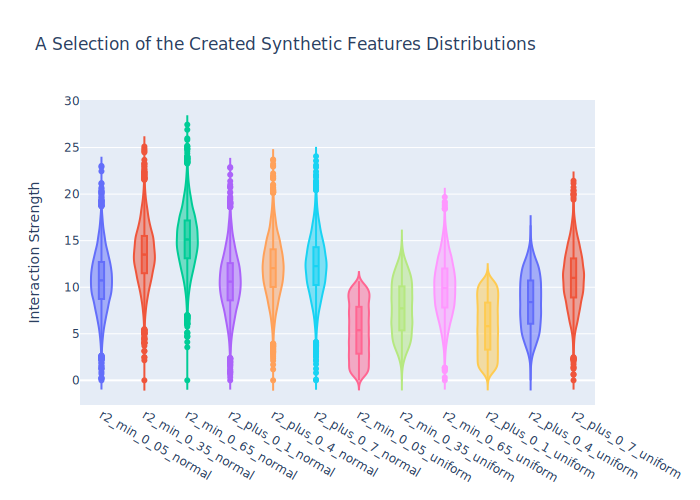

In [7]:
fig = go.Figure()

for rows in list(synth_df.columns[1::3]): # selecting only a subset to avoid overcrowding...
    fig.add_trace(go.Violin(y=synth_df[rows], name=str(rows), box_visible=True, meanline_visible=True))

fig.update_layout(showlegend=False, title={"text":"A Selection of the Created Synthetic Features Distributions"})
fig.update_yaxes(title_text="Interaction Strength")
fig.show("svg")

Evaluavate the correlation between each feature to every other feature 

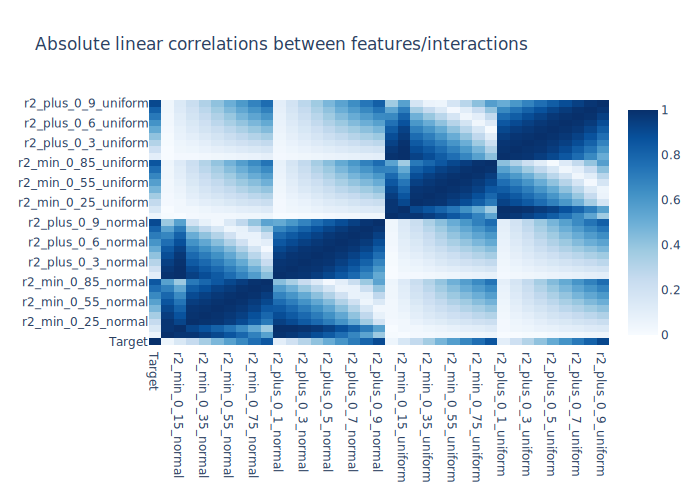

In [8]:
synth_df_corr = synth_df.corr().round(2)

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = synth_df_corr.columns, 
        y = synth_df_corr.index, 
        z = abs(np.array(synth_df_corr)), zmin=0, zmax=1,
        colorscale="blues",
    )
),

fig.update_layout(title={"text":"Absolute linear correlations between features/interactions"})
fig.show("svg")

Clearly many of the features/interactions have a high degree of multi-collinearity with each other which is useful as we will be able to test how the methods within KIF handle this. 

### Part 2: Convert The Regression Problem to a Binary Classification Problem 

To keep things simple I used mean of the target variable as a way to define the two classes (i.e., class defined based on if the target value is above or below the mean). 


In [9]:
synth_df["Binary_Target"] = np.where(synth_df["Target"] > synth_df["Target"].mean(), "Class1", "Class2")

with pd.option_context("display.max_rows", 6):
    display(synth_df)

,Target,r2_min_0_05_normal,r2_min_0_15_normal,r2_min_0_25_normal,r2_min_0_35_normal,r2_min_0_45_normal,r2_min_0_55_normal,r2_min_0_65_normal,r2_min_0_75_normal,r2_min_0_85_normal,...,r2_plus_0_1_uniform,r2_plus_0_2_uniform,r2_plus_0_3_uniform,r2_plus_0_4_uniform,r2_plus_0_5_uniform,r2_plus_0_6_uniform,r2_plus_0_7_uniform,r2_mplus_0_8_uniform,r2_plus_0_9_uniform,Binary_Target
0,14.302265,13.981,14.982,14.985,15.265,15.378,15.299,14.983,14.349,13.222,...,7.631,8.952,10.206,11.389,12.490,13.726,14.980,16.099,16.983,Class1
1,10.950260,10.209,10.579,12.003,12.743,13.364,13.848,14.164,14.254,13.993,...,5.837,6.845,7.802,8.704,9.544,10.542,11.586,12.538,13.327,Class1
2,12.917100,18.763,19.440,19.900,20.170,20.216,20.002,19.469,18.509,16.885,...,6.624,7.820,8.958,10.035,11.041,12.197,13.387,14.468,15.356,Class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9.629870,14.073,14.141,16.016,16.768,17.354,17.750,17.912,17.759,17.119,...,1.602,2.541,3.473,4.397,5.313,6.451,7.717,9.008,10.342,Class2
9998,8.104534,10.393,10.194,12.755,13.778,14.682,15.448,16.045,16.416,16.434,...,1.179,1.970,2.756,3.538,4.315,5.319,6.456,7.625,8.851,Class2
9999,10.281701,13.646,13.848,15.470,16.169,16.708,17.062,17.188,17.009,16.356,...,4.866,5.821,6.735,7.604,8.423,9.414,10.469,11.458,12.330,Class1


In [10]:
# Approx evenly distributed as expected. 
synth_df["Binary_Target"].value_counts()

Class2    5031
Class1    4969
Name: Binary_Target, dtype: int64

Now compare the class distributions to validate the approach used has worked. 

Ideally, those with higher linear correlations to the continuous target should have better class separation than those with lower ones.

This way we can use the known linear correlations as a form of "ground truth". Then each method with KIF will be tested in it's ability to correctly rank order these features. 

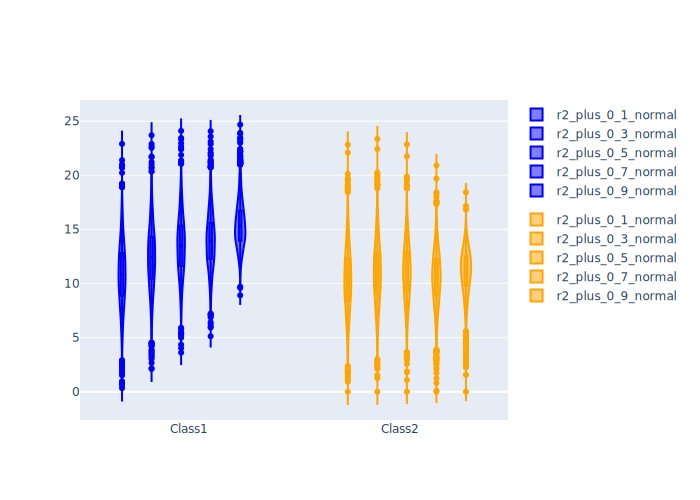

In [11]:
# Plot the data generated from some of the data generated from the normal distributions. 
normal_distribs = ["r2_plus_0_1_normal", "r2_plus_0_3_normal", "r2_plus_0_5_normal", "r2_plus_0_7_normal", "r2_plus_0_9_normal"]

fig = go.Figure()
for row in normal_distribs:
    fig.add_trace(go.Violin(x=synth_df["Binary_Target"][ synth_df["Binary_Target"] == "Class1" ],
                            y=synth_df[row][ synth_df["Binary_Target"] == "Class1" ],
                            legendgroup="Class1", scalegroup="Class1", name=str(row),
                            line_color='blue')
                )
    fig.add_trace(go.Violin(x=synth_df["Binary_Target"][ synth_df["Binary_Target"] == "Class2" ],
                            y=synth_df[row][ synth_df["Binary_Target"] == "Class2" ],
                            legendgroup="Class2", scalegroup="Class2", name=str(row),
                            line_color='orange')
                )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show("svg")

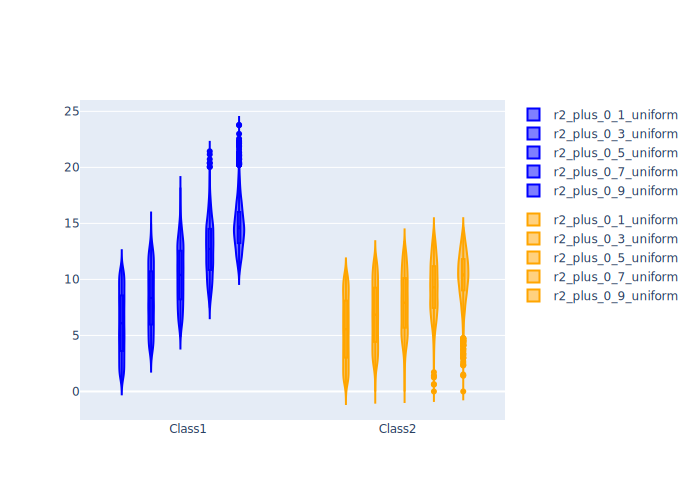

In [12]:
# Plot the data generated from some of the data generated from the uniform distributions. 
uniform_distribs = ["r2_plus_0_1_uniform", "r2_plus_0_3_uniform", "r2_plus_0_5_uniform", "r2_plus_0_7_uniform", "r2_plus_0_9_uniform"]

fig = go.Figure()
for row in uniform_distribs:
    fig.add_trace(go.Violin(x=synth_df["Binary_Target"][ synth_df["Binary_Target"] == "Class1" ],
                            y=synth_df[row][ synth_df["Binary_Target"] == "Class1" ],
                            legendgroup="Class1", scalegroup="Class1", name=str(row),
                            line_color='blue')
                )
    fig.add_trace(go.Violin(x=synth_df["Binary_Target"][ synth_df["Binary_Target"] == "Class2" ],
                            y=synth_df[row][ synth_df["Binary_Target"] == "Class2" ],
                            legendgroup="Class2", scalegroup="Class2", name=str(row),
                            line_color='orange')
                )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show("svg")

The binary classification problem has been successfully generated, as we can see the linear correlations generated from the continuous dataset can be used to rank order both the features for the classification problem as well as the regression problem. 

#### Save Generated Data

In [13]:
out_dir_path = Path("Raw")
if not out_dir_path.exists():
    Path.mkdir(out_dir_path)

synth_df.to_csv("Raw/synthetic_data.csv", index=False)
synth_df_corr.to_csv("Raw/synthetic_data_correls.csv", index=False)